# Coding Project 1 : Linear Regression and Regularization

**Please write the names of all group members here:**




---


*Note:* The provided structure for the code below is only suggestive, and if you want to structure your programs differently you may do so.

### Question 1 - Importing the Data

D'Agostino-Pearson normality test for non-transformed data: statistic=610.8359109472653, p-value=2.283848353787728e-133
Skewness: 1.8828757597682129
Skewness transformed data -0.008644001143304141
Kurtosis: 6.536281860064529
kurtosis transformed data 0.8707599064316245
Optimal λ for Box-Cox: -0.0769


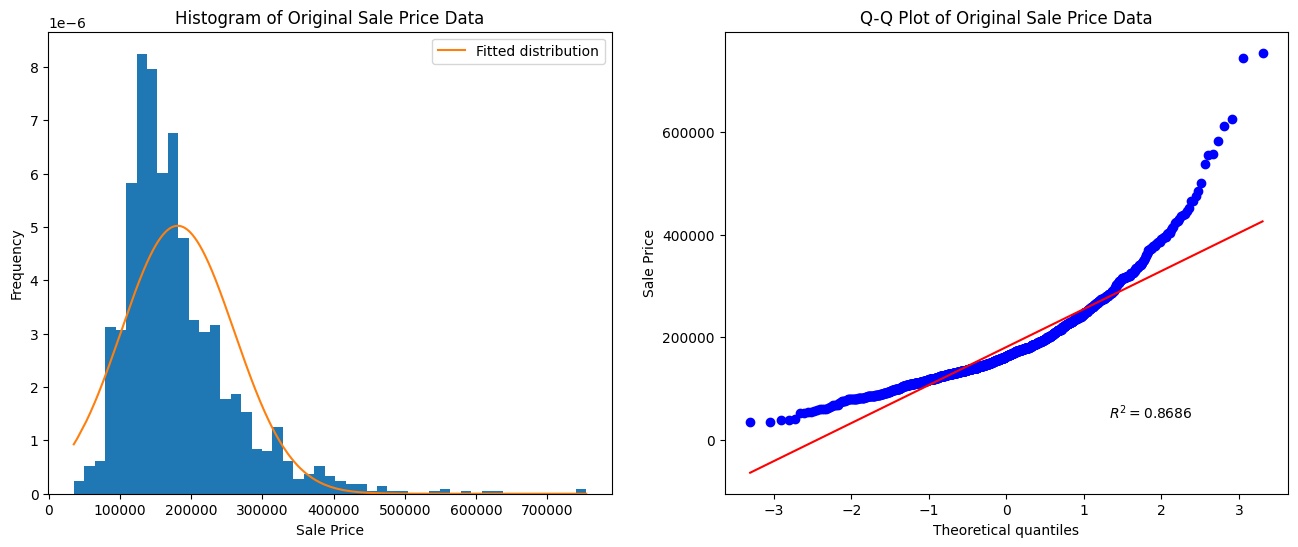

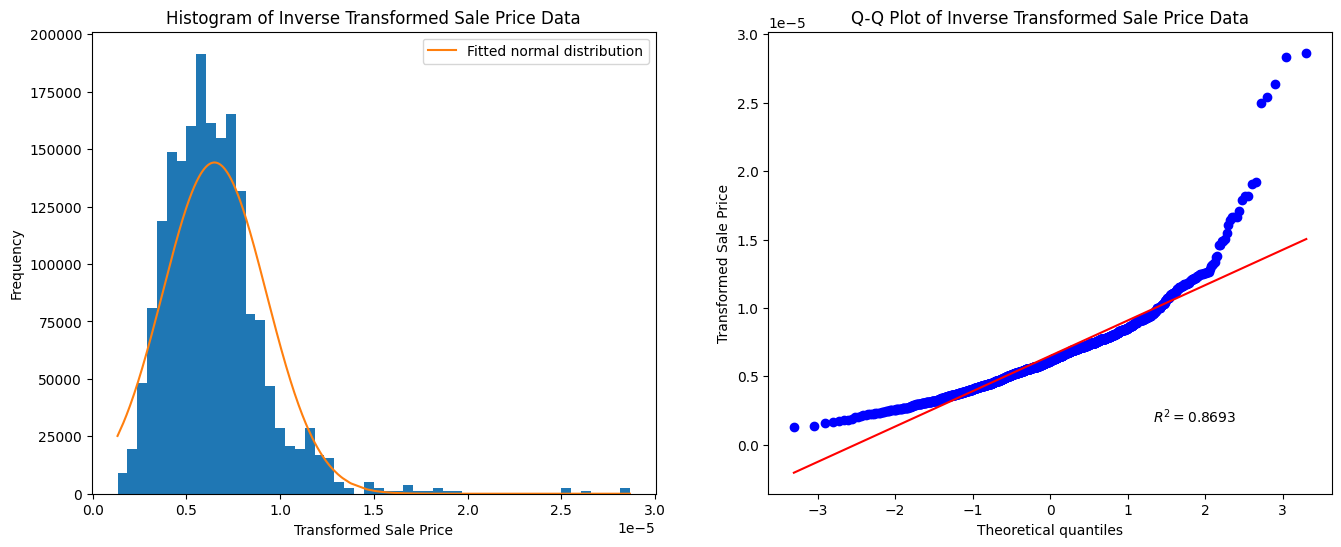

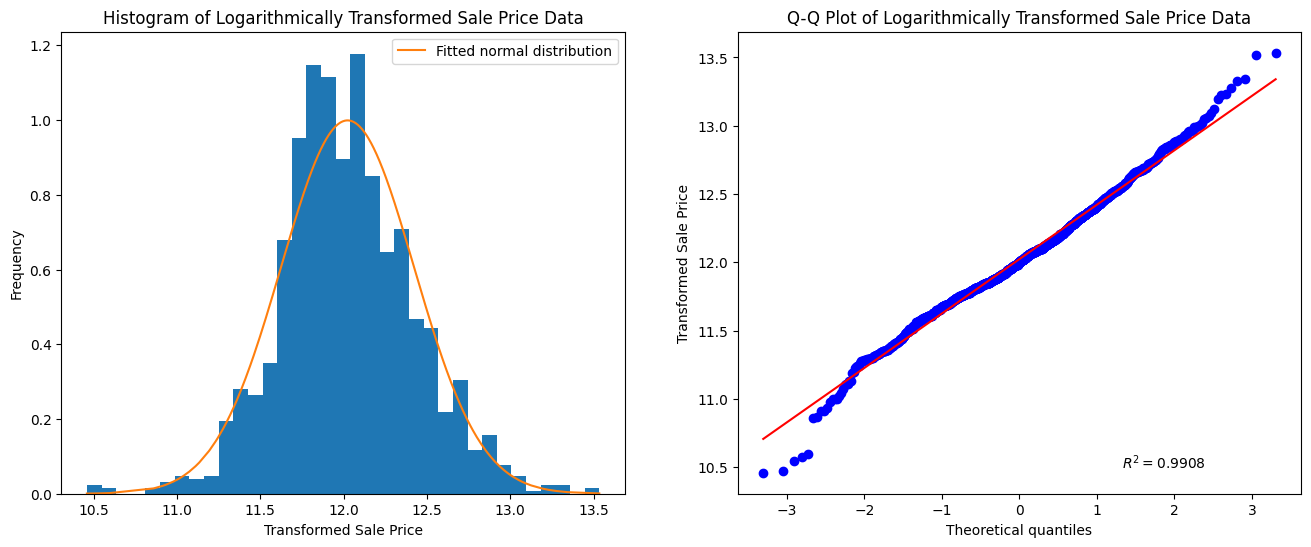

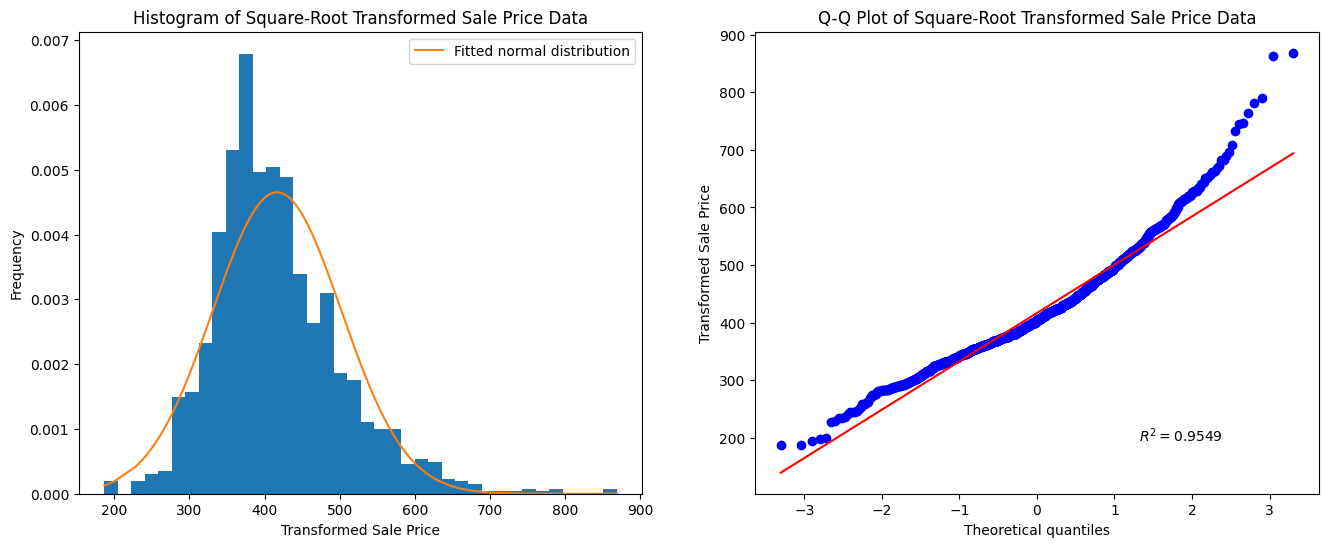

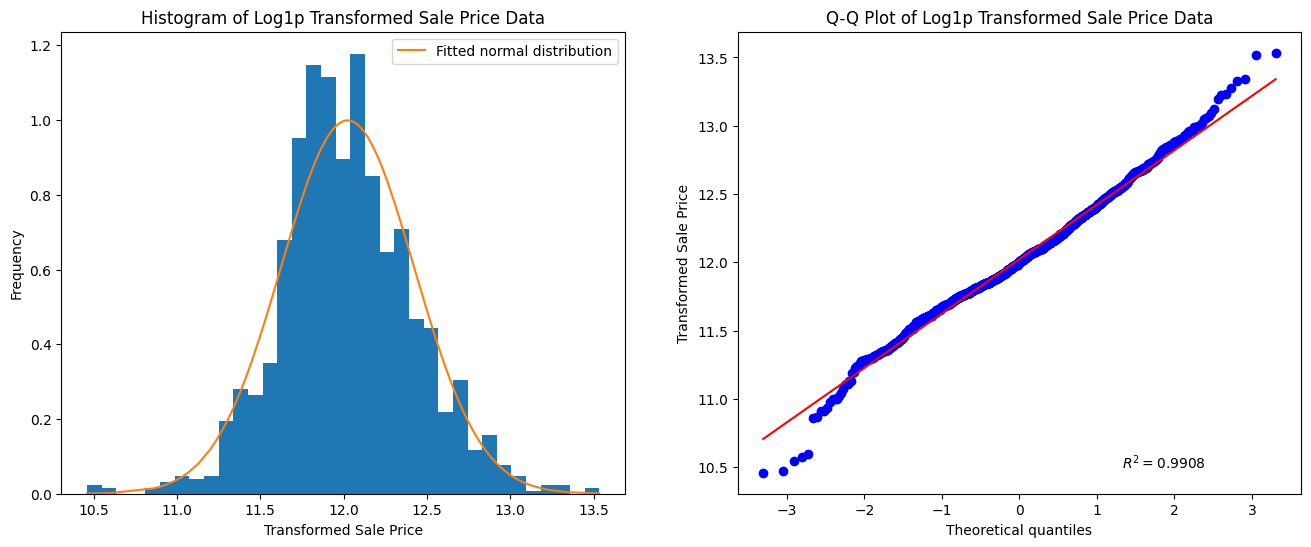

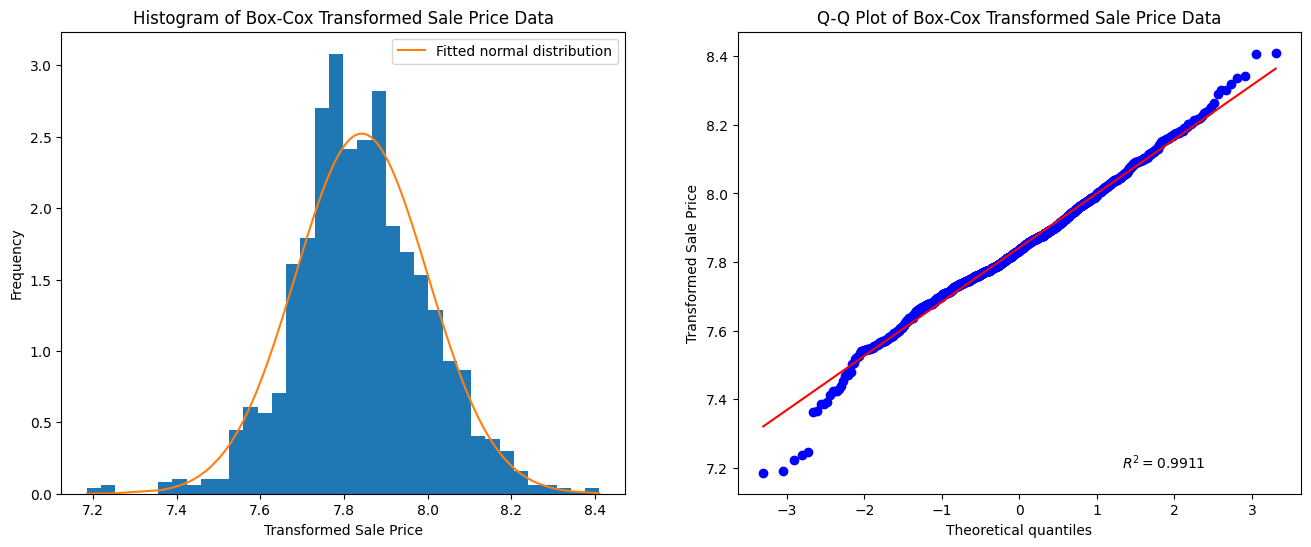

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
35
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedD

In [1]:
#For Question 1, you can import the following packages:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.model_selection  import train_test_split

# Function to fit a normal distribution to data and and calculate pdf normal
def fit_norm_pdf(data):
    mean, std = stats.norm.fit(data)
    sorted_data = np.sort(data)
    pdf = stats.norm.pdf(sorted_data, mean, std)
    return mean, std, pdf


#1.a) Import the dataset Housing.csv into Python as a pandas DataFrame.
#To determine whether a variable is categorical or numerical, please refer to the file data_description.txt.
#Remember that the first column of the csv file is an index column and should not be considered as an explanatory variable.

## ADJUST THE FILE PATH ACCORDING TO YOUR FOLDER STRUCTURE ##
housing_data = pd.read_csv("Housing.csv", index_col= 0)

#1.b) Graphically determine whether the target variable SalePrice is approximately Gaussian.

sale_price_orig = housing_data['SalePrice']

# Perform D'Agostino-Pearson normality test
stat, p = stats.normaltest(housing_data['SalePrice'])

print(f"D'Agostino-Pearson normality test for non-transformed data: statistic={stat}, p-value={p}")

# Box-Cox transformation of SalePrice
sale_price_trans_boxcox, lmbda_sale_price = stats.boxcox(housing_data['SalePrice'])

# log1p transformation
sale_price_trans_log1p = np.log1p(sale_price_orig)

# inverse transformation
sale_price_trans_inv = 1 / sale_price_orig

#logarithmic transformation
sale_price_trans_log = np.log(sale_price_orig)

# square-root transformation
sale_price_trans_sqrt = np.sqrt(sale_price_orig)


skewness = sale_price_orig.skew()
print("Skewness:", skewness)
print("Skewness transformed data", stats.skew(sale_price_trans_boxcox))

kurtosis = sale_price_orig.kurt()
print("Kurtosis:", kurtosis)
print("kurtosis transformed data", stats.kurtosis(sale_price_trans_boxcox))

print(f"Optimal λ for Box-Cox: {lmbda_sale_price:.4f}")


sale_price_orig_np = np.array(sale_price_orig)
sale_price_orig_np.sort()
sale_price_trans_sorted = np.sort(sale_price_trans_boxcox)

mean_orig, std_orig = stats.norm.fit(sale_price_orig_np, loc=0)
mean_trans, std_trans = stats.norm.fit(sale_price_trans_sorted, loc=0)

pdf_norm_orig = stats.norm.pdf(sale_price_orig_np, mean_orig, std_orig)
pdf_norm_trans = stats.norm.pdf(sale_price_trans_sorted, mean_trans, std_trans)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# q-q plot original data
prob = stats.probplot(sale_price_orig, dist=stats.norm, plot=ax2, rvalue=True)

# histogram original data
ax1.hist(sale_price_orig_np, bins='auto', density = True)
ax1.plot(sale_price_orig_np, pdf_norm_orig, label='Fitted distribution')
ax1.set_title("Histogram of Original Sale Price Data")
ax1.set_xlabel("Sale Price")
ax1.set_ylabel("Frequency")
ax1.legend()

ax2.set_title('Q-Q Plot of Original Sale Price Data')
ax2.set_ylabel('Sale Price')

plt.show()

# inverse transformation

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

prob = stats.probplot(sale_price_trans_inv, dist=stats.norm, plot=ax2, rvalue=True)

ax1.hist(sale_price_trans_inv, bins='auto', density = True)
ax1.plot(np.sort(sale_price_trans_inv), fit_norm_pdf(sale_price_trans_inv)[2], label='Fitted normal distribution')
ax1.set_title("Histogram of Inverse Transformed Sale Price Data")
ax1.set_xlabel("Transformed Sale Price")
ax1.set_ylabel("Frequency")
ax1.legend()

ax2.set_title(f'Q-Q Plot of Inverse Transformed Sale Price Data')
ax2.set_ylabel('Transformed Sale Price')

plt.show()

# logarithmic transformation

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

prob = stats.probplot(sale_price_trans_log, dist=stats.norm, plot=ax2, rvalue=True)

ax1.hist(sale_price_trans_log, bins='auto', density = True)
ax1.plot(np.sort(sale_price_trans_log), fit_norm_pdf(sale_price_trans_log)[2], label='Fitted normal distribution')
ax1.set_title("Histogram of Logarithmically Transformed Sale Price Data")
ax1.set_xlabel("Transformed Sale Price")
ax1.set_ylabel("Frequency")
ax1.legend()

ax2.set_title(f'Q-Q Plot of Logarithmically Transformed Sale Price Data')
ax2.set_ylabel('Transformed Sale Price')

plt.show()

# square-root transformation

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

prob = stats.probplot(sale_price_trans_sqrt, dist=stats.norm, plot=ax2, rvalue=True)

ax1.hist(sale_price_trans_sqrt, bins='auto', density = True)
ax1.plot(np.sort(sale_price_trans_sqrt), fit_norm_pdf(sale_price_trans_sqrt)[2], label='Fitted normal distribution')
ax1.set_title("Histogram of Square-Root Transformed Sale Price Data")
ax1.set_xlabel("Transformed Sale Price")
ax1.set_ylabel("Frequency")
ax1.legend()

ax2.set_title(f'Q-Q Plot of Square-Root Transformed Sale Price Data')
ax2.set_ylabel('Transformed Sale Price')

plt.show()

# log1p transformation

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

prob = stats.probplot(sale_price_trans_log1p, dist=stats.norm, plot=ax2, rvalue=True)

ax1.hist(sale_price_trans_log1p, bins='auto', density = True)
ax1.plot(np.sort(sale_price_trans_log1p), fit_norm_pdf(sale_price_trans_log1p)[2], label='Fitted normal distribution')
ax1.set_title("Histogram of Log1p Transformed Sale Price Data")
ax1.set_xlabel("Transformed Sale Price")
ax1.set_ylabel("Frequency")
ax1.legend()

ax2.set_title(f'Q-Q Plot of Log1p Transformed Sale Price Data')
ax2.set_ylabel('Transformed Sale Price')

plt.show()

# Box-Cox transformation

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

prob = stats.probplot(sale_price_trans_boxcox, dist=stats.norm, plot=ax2, rvalue=True)

ax1.hist(sale_price_trans_boxcox, bins='auto', density = True)
ax1.plot(np.sort(sale_price_trans_boxcox), fit_norm_pdf(sale_price_trans_boxcox)[2], label='Fitted normal distribution')
ax1.set_title("Histogram of Box-Cox Transformed Sale Price Data")
ax1.set_xlabel("Transformed Sale Price")
ax1.set_ylabel("Frequency")
ax1.legend()

ax2.set_title(f'Q-Q Plot of Box-Cox Transformed Sale Price Data')
ax2.set_ylabel('Transformed Sale Price')

plt.show()



# Perform D'Agostino-Pearson normality test on transformed data
# stat_transformed, p_transformed = stats.normaltest(sale_price_trans)

# print(f"D'Agostino-Pearson normality test for transformed data: statistic={stat_transformed:.3f}, p-value={p_transformed:.3f}")


#If not, suggest a suitable transformation to bring SalePrice closer to a Gaussian distribution (logarithmic, inverse, square-root, ...).

# As we can see the histogram and q-q plot the original data is not gaussian normally distributed. The data clearly shows a lot of skewness, meaning the
# data is very asymmetric around it's mean. In particullar there is a strong prositive skew with a skewness factor of 1.88. The red line in the q-q plot
# indicates the theoretical quantiles of the reference distribution, which in our case is the normal distribution. The goal is therefore that all of
# the dots in the q-q plot lie along this line. 

#Do not forget to apply this transformation to the target variable SalePrice in the dataset.

#Why is it important to consider such potential transformations?

# In general, we can perform linear regression on data that is not normally distributed. What matters is that the residuals (errors) are 
# approximately normally distributed. If this assumption holds, then the OLS estimators are not only unbiased but also efficient
# (optimal under the Gauss–Markov theorem). Furthermore, normal residuals are especially important when performing statistical inference
# (e.g. t-tests, confidence intervals), because these tests rely on the normality of the error terms for their validity.


# Looking at the different transformations above, we can see that the Box-Cox transformation seems to perform best in terms of making the data
# more normally distributed. The skewness is reduced from 1.88 to 0.27 and the kurtosis from 6.54 to 0.98. The histogram also looks
# more symmetric and the q-q plot shows that the points lie closer to the red line, indicating that the transformed data is closer to a normal distribution.

sale_price_trans = sale_price_trans_log1p

#1.c) Split the data into a training set (X,y)_train and a test set (X,y)_test.
#Randomly assign 70% of the observations to the training set and the remaining 30% to the test set.

X = housing_data.drop(columns="SalePrice")
y = sale_price_trans


# Split data, use different random_stat integerst to check if the result is stable across different distinct random seeds
X_train, X_test, y_train_trans, y_test_trans = train_test_split(
    X, y, test_size=0.3, random_state=42
)

#1.d) Replace missing values in X using the training data statistics only -> use .fillna(...)
#For numerical features, replace missing values with the mean of the column .
#For categorical features, replace missing values with the most frequent category.
#You can use the function df.select_dtypes(...) to idetify categorical variables as the variables with type 'object' and 'category'. 
#Some categorical variables admit NA (or None) as a valid category, which should be treated as an actual level and not as missing.

categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# manually need to add feature MSSubclass as it is a categorical feature as well even though it has numerical values

categorical_features.append('MSSubClass')

numerical_features = X_train.drop(columns=categorical_features).columns.tolist()

print(numerical_features)
print(len(numerical_features))

print(categorical_features)
print(len(categorical_features))

# Features where NA is a valid category
na_valid_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                     'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

# Create new list where NA-valid features from categorical_features list is removed
impute_features = [col for col in categorical_features if col not in na_valid_features]

# replace missing values in X_train where necessary
X_train[impute_features] = X_train[impute_features].fillna(X_train[impute_features].mode().iloc[0])
X_train[numerical_features] = X_train[numerical_features].fillna(X_train[numerical_features].mean())


# replace missing values in X_test from the numerical features in the test set as there are NAs some of the numerical features
X_test[numerical_features] = X_test[numerical_features].fillna(X_train[numerical_features].mean())

# standardize all numerical features in X_train with z-score transformation and apply the same transformation to X_test
train_means = X_train[numerical_features].mean()
train_stds = X_train[numerical_features].std()


X_train[numerical_features] = (X_train[numerical_features] - train_means) / train_stds
X_test[numerical_features]  = (X_test[numerical_features] - train_means) / train_stds

# one-hot encode categorical features in X_train
X_train = pd.get_dummies(X_train, dummy_na=True, columns=categorical_features, drop_first=True)

# one-hot encode categorical features in X_Test
X_test = pd.get_dummies(X_test, dummy_na=True, columns=categorical_features, drop_first=True)

# ensure that X_test has the same columns as X_train 
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# list columns that contain any NaN
print("Cols with NaN:", X_test.columns[X_test.isna().any()].tolist())


### Question 2 - Linear Regression on Numerical Features

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#2.a) Fit a linear regression model on the training dataset with numerical features only using the sklearn package.
# The regression should include an intercept term. 
X_train_numerical = X_train[numerical_features]
X_test_numerical = X_test[numerical_features]

reg = LinearRegression().fit(X_train_numerical, y_train_trans)

y_pred_train_trans = reg.predict(X_train_numerical)
y_pred_test_trans = reg.predict(X_test_numerical)

# If you transformed the target variable, you have to inverse-transform the predictions before computing MSE and R2, 
# so that these metrics are reported on the original SalePrice scale.

y_pred_train_orig = np.expm1(y_pred_train_trans)    # inverse of log1p
y_pred_test_orig = np.expm1(y_pred_test_trans)

y_train_orig = np.expm1(y_train_trans)
y_test_orig = np.expm1(y_test_trans)

#Output a table with the name of each feature and the associated regression coefficient.
coef_table = pd.DataFrame({"feature": numerical_features,"coefficient": reg.coef_})
coef_table.loc[-1] = ["Intercept", reg.intercept_]
coef_table.index = coef_table.index + 1
coef_table = coef_table.sort_index()

print("regression coefficients:")
print(coef_table)

#Compare the in-sample and out-of-sample Mean Squared Error (MSE) and R^2.
MSE_train_orig = mean_squared_error(y_train_orig, y_pred_train_orig)
MSE_test_orig = mean_squared_error(y_test_orig, y_pred_test_orig)
R2_train_orig = r2_score(y_train_orig, y_pred_train_orig)
R2_test_orig = r2_score(y_test_orig, y_pred_test_orig)

print("\noriginal scale (SalePrice):")
print(f"in-sample MSE: {MSE_train_orig:.4f}, R^2: {R2_train_orig:.4f}")
print(f"out-of-sample MSE: {MSE_test_orig:.4f}, R^2: {R2_test_orig:.4f}")

# In addition, also report the MSE and R2 on the transformed scale, and comment on the differences between the two.
MSE_train_trans = mean_squared_error(y_train_trans, y_pred_train_trans)
MSE_test_trans = mean_squared_error(y_test_trans, y_pred_test_trans)
R2_train_trans = r2_score(y_train_trans, y_pred_train_trans)
R2_test_trans = r2_score(y_test_trans, y_pred_test_trans)

print("\ntransformed scale (log1p SalePrice):")
print(f"in-sample MSE: {MSE_train_trans:.4f}, R^2: {R2_train_trans:.4f}")
print(f"out-of-sample MSE: {MSE_test_trans:.4f}, R^2: {R2_test_trans:.4f}")

# What does each set of metrics tell you about model performance?

# On the log-transformed scale, the model explains ~86–87% of the variance in SalePrice, with very small MSE. 
# This shows the model captures relative (percentage) differences in prices well and generalizes without much overfitting.

# On the original SalePrice scale, the model explains ~76–88% of the variance, with RMSE around $30k–40k. 
# Errors on expensive houses weigh more heavily here, so MSE looks larger.

regression coefficients:
          feature  coefficient
0       Intercept    12.028899
1     LotFrontage    -0.001184
2         LotArea     0.021460
3     OverallQual     0.114338
4     OverallCond     0.047949
5       YearBuilt     0.091426
6    YearRemodAdd     0.027564
7      MasVnrArea    -0.006482
8      BsmtFinSF1     0.009727
9      BsmtFinSF2     0.001544
10      BsmtUnfSF     0.002211
11    TotalBsmtSF     0.012726
12       1stFlrSF     0.039123
13       2ndFlrSF     0.019685
14   LowQualFinSF     0.005419
15      GrLivArea     0.045546
16   BsmtFullBath     0.034196
17   BsmtHalfBath     0.003012
18       FullBath     0.016306
19       HalfBath     0.011662
20   BedroomAbvGr     0.006730
21   KitchenAbvGr    -0.024333
22   TotRmsAbvGrd     0.030204
23     Fireplaces     0.033571
24    GarageYrBlt    -0.011872
25     GarageCars     0.059926
26     GarageArea     0.011736
27     WoodDeckSF     0.015838
28    OpenPorchSF    -0.004767
29  EnclosedPorch     0.012229
30      3SsnPo

In [3]:
#2.b) you will now use matrix algebra in Python with the numpy package to compute the standard errors of the estimated coefficients βˆ. 
# All computations in this part should be performed using the training set only.

# Let A ∈ R^(m×(d+1)) denote the design matrix 
#Remember that the design matrix A needs to include a column of 1's. Use np.linalg.solve(...).
features = X_train_numerical.values
ones = np.ones((X_train_numerical.shape[0], 1))
A = np.hstack([ones, features])

# and let y ∈ R^m denote the observed target values.
y = y_train_trans.values.reshape(-1, 1)

In [4]:
# (i) Compute the estimated coefficients β for each explanatory variable using the numpy package. 
# Practical note: In code, do not form matrix inverses explicitly; 
# instead use a numerically stable equivalent such as np.linalg.solve(A.T @ A, A.T @ y).
beta_hat = np.linalg.solve(A.T @ A, A.T @ y)

In [5]:
# (ii) Compute the standard error of each estimated coefficient using the numpy package.
y_hat = A @ beta_hat
diff = y-y_hat
m, d_plus_1 = A.shape
sigma2_hat = (diff.T @ diff)/(m-d_plus_1)

var_beta = sigma2_hat[0,0] * np.linalg.inv(A.T @ A)
SE_beta = np.sqrt(np.diag(var_beta))

# Recall that j = 0 corresponds to the intercept
coef_table_np = pd.DataFrame({"feature": ["Intercept"] + numerical_features,"coefficient": beta_hat.flatten(),"stderror": SE_beta})
print("\nregression coefficients with stderr:")
print(coef_table_np)


regression coefficients with stderr:
          feature  coefficient       stderror
0       Intercept    12.028899       0.004723
1     LotFrontage    -0.001184       0.005668
2         LotArea     0.021460       0.005318
3     OverallQual     0.114338       0.008462
4     OverallCond     0.047949       0.005957
5       YearBuilt     0.091426       0.010843
6    YearRemodAdd     0.027564       0.007468
7      MasVnrArea    -0.006482       0.005633
8      BsmtFinSF1     0.599441  164562.462528
9      BsmtFinSF2     0.195406   54098.123533
10      BsmtUnfSF     0.574020  159565.660037
11    TotalBsmtSF    -0.560902  160073.297291
12       1stFlrSF     0.664954            NaN
13       2ndFlrSF     0.728373            NaN
14   LowQualFinSF     0.082452            NaN
15      GrLivArea    -0.807485            NaN
16   BsmtFullBath     0.034196       0.007026
17   BsmtHalfBath     0.003012       0.005165
18       FullBath     0.016306       0.008027
19       HalfBath     0.011662       0.006

C:\Users\HY\AppData\Local\Temp\ipykernel_17920\908020409.py:8: RuntimeWarning: invalid value encountered in sqrt
  SE_beta = np.sqrt(np.diag(var_beta))


In [6]:
# (iii) Compute the (in-sample) MSE and R^2 using the numpy package.
MSE_train_np = np.mean(diff.flatten()**2)  
R2_train_np = 1 - (np.sum(diff**2) / np.sum((y-y.mean())**2))   

print("\nusing numpy package:")
print(f"in-sample MSE: {MSE_train_np:.4f}")
print(f"in-sample R²: {R2_train_np:.4f}")


using numpy package:
in-sample MSE: 0.0220
in-sample R²: 0.8581


In [7]:
# (iv) Do the results change using pseudoinversion instead of standard matrix inversion? Use np.linalg.pinv(...).
# Replace (A^T A)^−1A by the Moore–Penrose pseudoinverse A^+ (use np.linalg.pinv)
beta_hat_pinv = np.linalg.pinv(A) @ y
diff_pinv = y - A @ beta_hat_pinv
sigma2_hat_pinv = (diff_pinv.T @ diff_pinv)/(m-d_plus_1)
var_beta_pinv = sigma2_hat_pinv[0,0] * np.linalg.pinv(A.T @ A)
SE_beta_pinv = np.sqrt(np.diag(var_beta_pinv))

coef_table_pinv = pd.DataFrame({"feature": ["Intercept"] + numerical_features,"coefficient": beta_hat_pinv.flatten(),"stderror": SE_beta_pinv})
print("\nregression coefficients with stderr:")
print(coef_table_np)

print("\npseudoinverse comparison:")
print("difference in coefficients:",np.linalg.norm(beta_hat-beta_hat_pinv))
print("difference in stderr:",np.linalg.norm(SE_beta-SE_beta_pinv))

# Briefly explain when the results are identical and when they can differ.

_, n = A.shape
rank = np.linalg.matrix_rank(A)

print(f"columns: {n}")
print(f"rank of A: {rank}")

if rank < n:
    print("A is rank-deficient.")
else:
    print("A is full rank.")

# In our case A is rank-deficient or nearly collinear (some columns are linearly dependent), the explicit inverse 
# becomes unstable. This can produce extremely large or negative values in var_beta, resulting in NaN for SE_beta.
# Also we get a RuntimeWarning: invalid value encountered in sqrt SE_beta = np.sqrt(np.diag(var_beta)).

# Using np.linalg.pinv is much more stable in these cases.
# It handles singular or ill-conditioned matrices better and yields valid standard errors for all coefficients.

# I assume when the design matrix A is full rank and well-conditioned, 
# using np.linalg.inv(A.T @ A) or np.linalg.pinv(A.T @ A) will produce nearly identical results for beta_hat and the standard errors.



regression coefficients with stderr:
          feature  coefficient       stderror
0       Intercept    12.028899       0.004723
1     LotFrontage    -0.001184       0.005668
2         LotArea     0.021460       0.005318
3     OverallQual     0.114338       0.008462
4     OverallCond     0.047949       0.005957
5       YearBuilt     0.091426       0.010843
6    YearRemodAdd     0.027564       0.007468
7      MasVnrArea    -0.006482       0.005633
8      BsmtFinSF1     0.599441  164562.462528
9      BsmtFinSF2     0.195406   54098.123533
10      BsmtUnfSF     0.574020  159565.660037
11    TotalBsmtSF    -0.560902  160073.297291
12       1stFlrSF     0.664954            NaN
13       2ndFlrSF     0.728373            NaN
14   LowQualFinSF     0.082452            NaN
15      GrLivArea    -0.807485            NaN
16   BsmtFullBath     0.034196       0.007026
17   BsmtHalfBath     0.003012       0.005165
18       FullBath     0.016306       0.008027
19       HalfBath     0.011662       0.006


OLS
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     181.0
Date:                Sat, 04 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:28:57   Log-Likelihood:                 500.29
No. Observations:                1022   AIC:                            -932.6
Df Residuals:                     988   BIC:                            -765.0
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0289      0.005   254

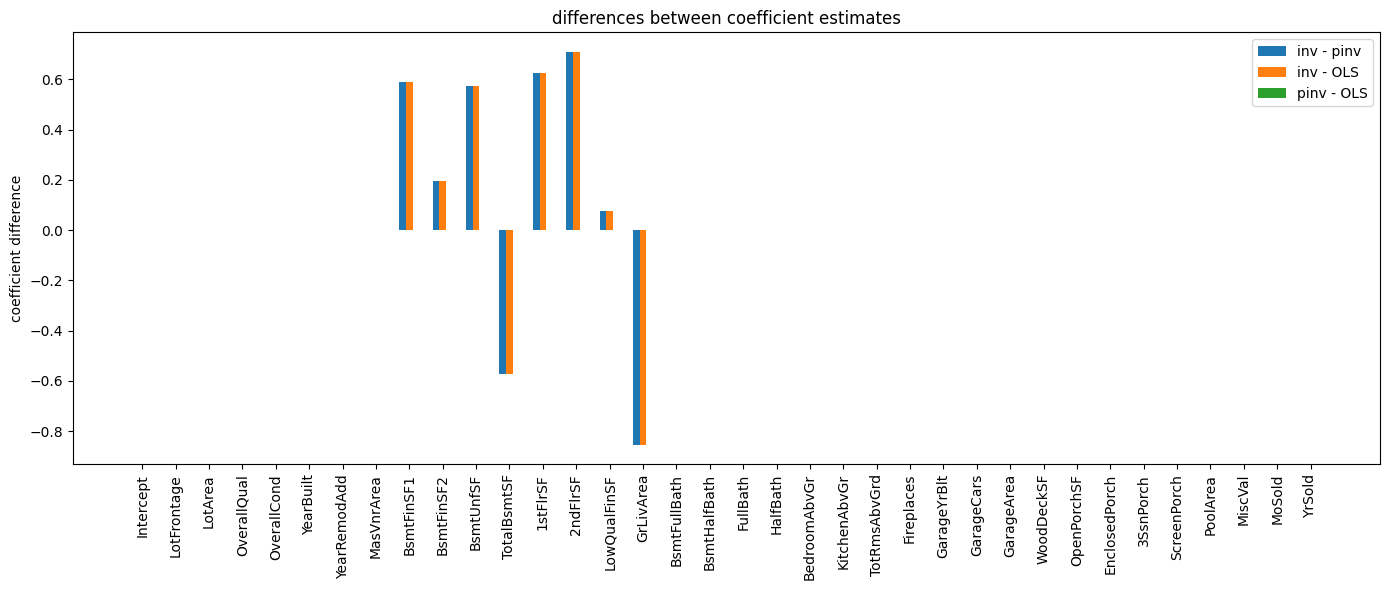

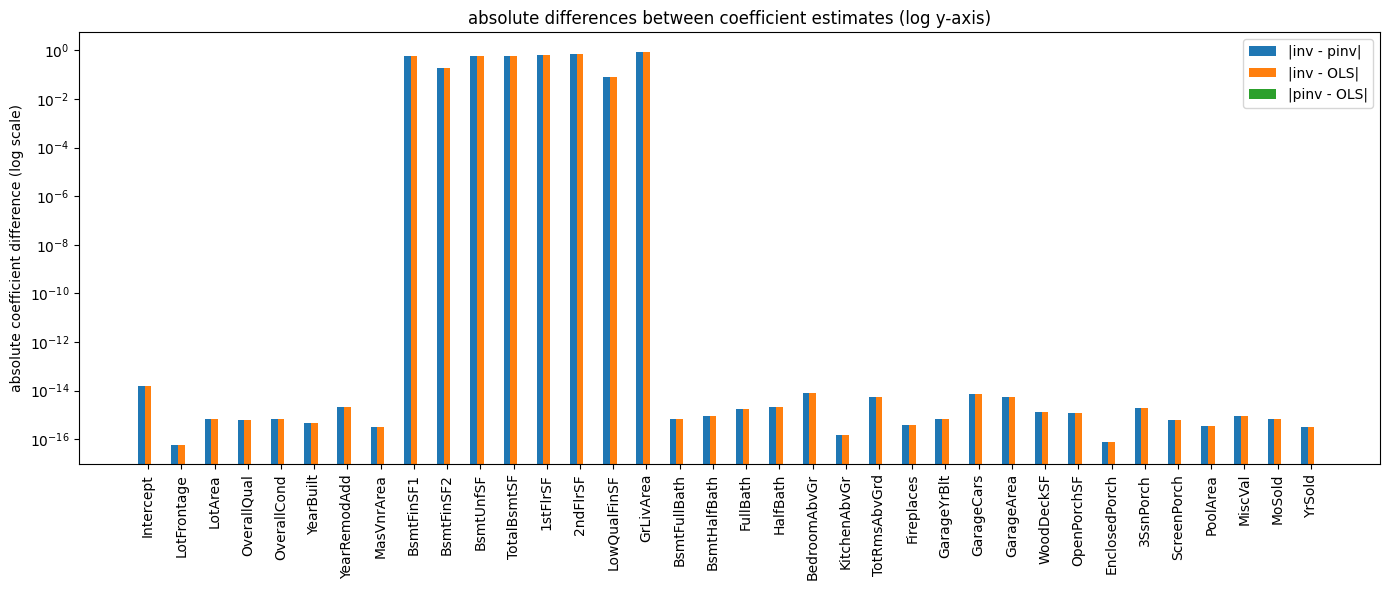

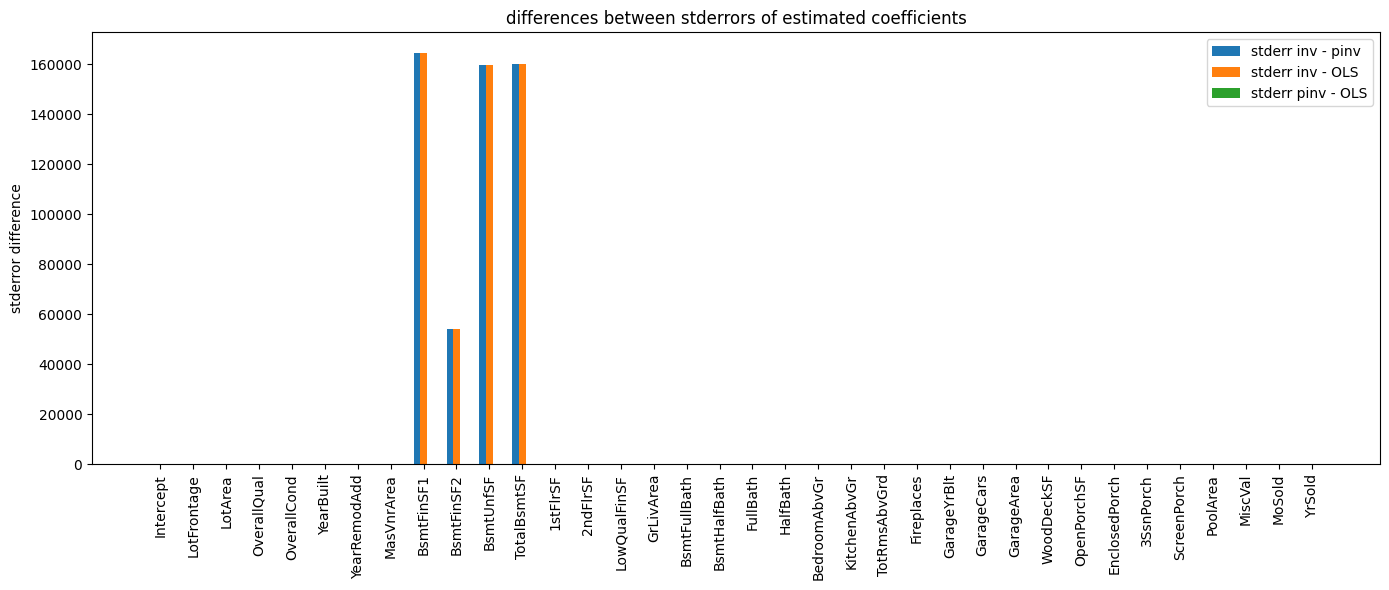

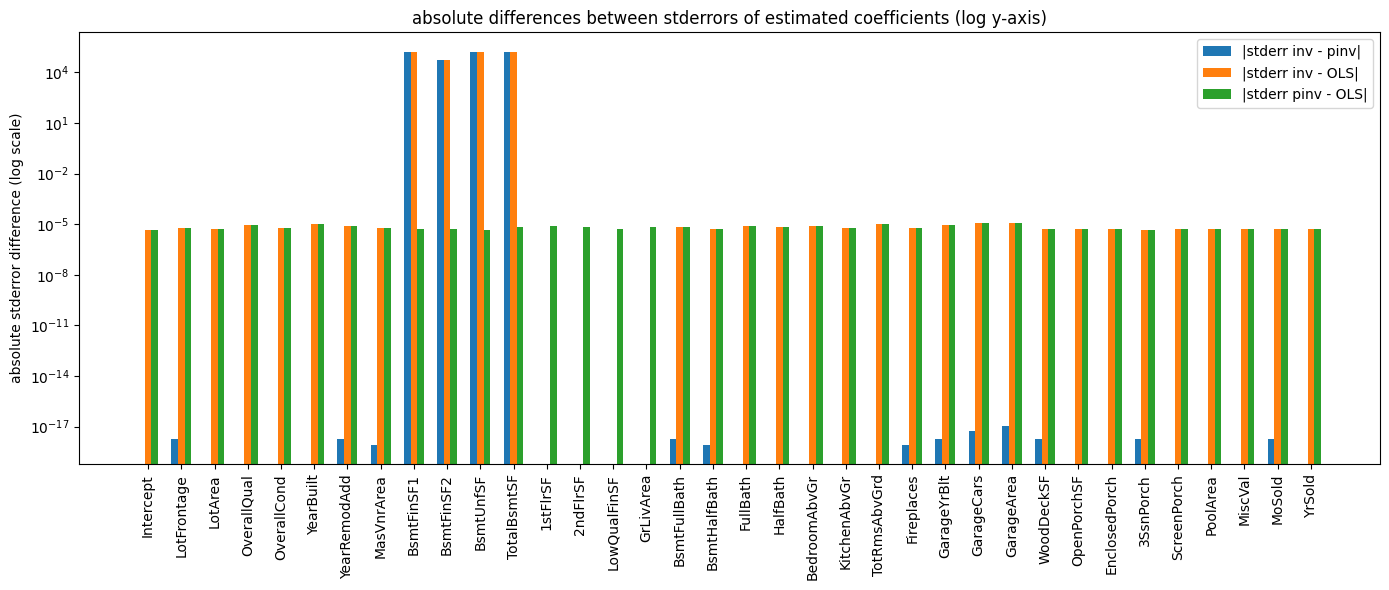

In [8]:
# (v) Compare your results (with and without pseudoinversion) to the output of the sm.OLS(...) function.
import statsmodels.api as sm

OLS_model = sm.OLS(y_train_trans, sm.add_constant(X_train_numerical))
OLS_results = OLS_model.fit()
print("\nOLS")
print(OLS_results.summary())

coef_table_OLS = pd.DataFrame({"feature": sm.add_constant(X_train_numerical).columns,"coefficient": OLS_results.params,"stderror": OLS_results.bse})

print("\ncoefficients from OLS:")
print(coef_table_OLS)

# one single comparison table 
comparison_table = pd.DataFrame({
    "feature": ["Intercept"] + numerical_features,
    "coeff, inv": beta_hat.flatten(), 
    "stderr inv": SE_beta, 
    "coeff, pinv": beta_hat_pinv.flatten(), 
    "stderr, pinv": SE_beta_pinv, 
    "coeff, OLS": OLS_results.params.values, 
    "stderr, OLS": OLS_results.bse.values}) 
pd.set_option('display.float_format', '{:.6f}'.format) # better formatting 
print("\n\nRESULT COMPARISON (with & without pseudoinversion, OLS)") 
print(comparison_table)

# comparison plot of the differences may be insightful
diff_inv_pinv = comparison_table['coeff, inv'] - comparison_table['coeff, pinv']
diff_inv_OLS = comparison_table['coeff, inv'] - comparison_table['coeff, OLS']
diff_pinv_OLS = comparison_table['coeff, pinv'] - comparison_table['coeff, OLS']
features_to_plot = comparison_table['feature']
x = np.arange(len(features_to_plot))

fig, ax = plt.subplots(figsize=(14, 6))

ax.bar(x - 0.2, diff_inv_pinv, width=0.2, label='inv - pinv')
ax.bar(x, diff_inv_OLS, width=0.2, label='inv - OLS')
ax.bar(x + 0.2, diff_pinv_OLS, width=0.2, label='pinv - OLS')
ax.set_xticks(x)
ax.set_xticklabels(features_to_plot, rotation=90)
ax.set_ylabel('coefficient difference')
ax.set_title('differences between coefficient estimates')
ax.legend()
plt.tight_layout()
plt.show()

# maybe we can make it more clearer in a log scale
fig, ax = plt.subplots(figsize=(14, 6))

ax.bar(x - 0.2, np.abs(diff_inv_pinv), width=0.2, label='|inv - pinv|')
ax.bar(x, np.abs(diff_inv_OLS), width=0.2, label='|inv - OLS|')
ax.bar(x + 0.2, np.abs(diff_pinv_OLS), width=0.2, label='|pinv - OLS|')
ax.set_yscale('log')  # log scale for clarity
ax.set_xticks(x)
ax.set_xticklabels(features_to_plot, rotation=90)
ax.set_ylabel('absolute coefficient difference (log scale)')
ax.set_title('absolute differences between coefficient estimates (log y-axis)')
ax.legend()
plt.tight_layout()
plt.show()

# now for stderrors
stderr_inv = np.nan_to_num(comparison_table['stderr inv'], nan=0.0)
stderr_pinv = np.nan_to_num(comparison_table['stderr, pinv'], nan=0.0)
stderr_OLS = np.nan_to_num(comparison_table['stderr, OLS'], nan=0.0)
diff_stderr_inv_pinv = stderr_inv - stderr_pinv
diff_stderr_inv_OLS = stderr_inv - stderr_OLS
diff_stderr_pinv_OLS = stderr_pinv - stderr_OLS
features_to_plot = comparison_table['feature']
x = np.arange(len(features_to_plot))

fig, ax = plt.subplots(figsize=(14, 6))

ax.bar(x - 0.2, diff_stderr_inv_pinv, width=0.2, label='stderr inv - pinv')
ax.bar(x, diff_stderr_inv_OLS, width=0.2, label='stderr inv - OLS')
ax.bar(x + 0.2, diff_stderr_pinv_OLS, width=0.2, label='stderr pinv - OLS')

ax.set_xticks(x)
ax.set_xticklabels(features_to_plot, rotation=90)
ax.set_ylabel('stderror difference')
ax.set_title('differences between stderrors of estimated coefficients')
ax.legend()
plt.tight_layout()
plt.show()

# in log too
fig, ax = plt.subplots(figsize=(14, 6))

ax.bar(x - 0.2, diff_stderr_inv_pinv, width=0.2, label='|stderr inv - pinv|')
ax.bar(x, diff_stderr_inv_OLS, width=0.2, label='|stderr inv - OLS|')
ax.bar(x + 0.2, diff_stderr_pinv_OLS, width=0.2, label='|stderr pinv - OLS|')

ax.set_yscale('log')  # log scale for clarity
ax.set_xticks(x)
ax.set_xticklabels(features_to_plot, rotation=90)
ax.set_ylabel('absolute stderror difference (log scale)')
ax.set_title('absolute differences between stderrors of estimated coefficients (log y-axis)')
ax.legend()
plt.tight_layout()
plt.show()

### Question 3 - Regularization Techniques

In [9]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, RepeatedKFold, KFold

# 3.a) Linear regression with the full Housing dataset (numerical + categorical).
#How do the in-sample and out-of-sample metrics change when including categorical features, and what does this reveal about the model’s ability to generalize?

# The r_2 value increases and MSE decreases significantly for in-sample analysis when adding the categorical features. One does however see that the metrics 
# of the out-of-sample values are drastically worse. This can come from the model overfitting to the training data and therefore not being able to generalize
# when given unseen data. 

reg = LinearRegression().fit(X_train,y_train_trans)

y_pred_in_sample = reg.predict(X_train)
MSE_in_sample = mean_squared_error(y_train_trans,y_pred_in_sample)
print("R² for in-sample data:", r2_score(y_train_trans,y_pred_in_sample))
print("MSE for in-sample data:", MSE_in_sample)


y_pred_out_sample = reg.predict(X_test)
MSE_out_sample = mean_squared_error(y_test_trans,y_pred_out_sample)
print("R² for out-sample data:", r2_score(y_test_trans,y_pred_out_sample))
print("MSE for out-sample data:", MSE_out_sample)


#3.b) Implement the Truncated Pseudoinverse, Ridge, Lasso, and Elastic Net regularization techniques.
#Use 8-fold cross-validation to tune the hyperparameters of each regularization technique based on the MSE metric.
#Why is it important that the intercept is not penalized in these models?

#Compare their performance in terms of in-sample and out-of-sample MSE and R2 with the linear regressions of Questions 2.a) and 3.a).


#3.c) During cross-validation, what are possible sources of information leakage? 
#Briefly describe what leakage means in this context, and explain what steps you would take to avoid it if you were building a more complete data preprocessing pipeline (e.g., with imputation, scaling, or encoding). 
#You do not need to implement these steps here, only to explain the idea.


#3.d) For the  Lasso and Elastic Net regressions, how many coefficients are non-zero?

#Compare this number with the number of coefficients retained by the Ridge and Truncated Pseudoinverse models and provide an explanation.


#3.e) #Based on your findings from Questions 2 and 3, which model would you recommend for predicting house prices? 
#Justify your choice not only by comparing performance metrics, but also by discussing the nature of the problem (e.g., number of features, presence of categorical variables, potential collinearity, sparsity, nonlinearity). 
#Explain how the strengths and limitations of the chosen method align with this problem structure.



R² for in-sample data: 0.9499312847727778
MSE for in-sample data: 0.00776083320783894
R² for out-sample data: -7.913950648833477
MSE for out-sample data: 1.512197724455715
